## Indicators: Learning & Predictions

In [25]:
import pandas as pd
import datetime
from pandas_datareader import DataReader
import yfinance as yf
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [23]:
ticker = 'AAPL'
start_date = datetime.datetime.now() - datetime.timedelta(days=365)
end_date = datetime.date.today()

df = yf.download(symbol, start, end)

# Calculate additional features (SMA, Bollinger Bands, Donchian Channels)
for sma_period in [5, 10, 20, 50, 100, 200]:
    df[f'SMA_{sma_period}'] = df['Close'].rolling(sma_period).mean()

for band in [10, 20]:
    df[f'BollingerBand_Up_{band}_2'] = df['Close'].rolling(band).mean() + 2 * df['Close'].rolling(band).std()
    df[f'BollingerBand_Down_{band}_2'] = df['Close'].rolling(band).mean() - 2 * df['Close'].rolling(band).std()

for channel_period in [5, 10, 20, 50, 100, 200]:
    df[f'Donchian_Channel_Up_{channel_period}'] = df['High'].rolling(channel_period).max()
    df[f'Donchian_Channel_Down_{channel_period}'] = df['Low'].rolling(channel_period).min()

# Prepare data for models
newdata = df[['Close']].join(df.shift(1), rsuffix='_shifted')
newdata['target'] = newdata['Close'].shift(-5)
newdata.dropna(inplace=True)

[*********************100%%**********************]  1 of 1 completed


In [26]:
X = newdata.drop('target', axis=1)
Y = newdata['target']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Train and compare multiple models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'K Neighbors': KNeighborsRegressor(),
    'MLP Regressor': MLPRegressor(max_iter=5000),
    'Bagging Regressor': BaggingRegressor(),
    'AdaBoost Regressor': AdaBoostRegressor() }

for name, model in models.items():
    if name in ['Random Forest', 'Gradient Boosting', 'MLP Regressor', 'Bagging Regressor', 'AdaBoost Regressor']:
        grid_search = RandomizedSearchCV(model, {}, cv=5, scoring="neg_mean_absolute_error")
        grid_search.fit(X_train, y_train)
        model = grid_search.best_estimator_
    else:
        model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"{name} MAE: {mae}")

Linear Regression MAE: 2.3733565046099327
Random Forest MAE: 1.893923637390138
Gradient Boosting MAE: 2.0033242442728607
K Neighbors MAE: 6.473900299072264
MLP Regressor MAE: 2885.474810768433
Bagging Regressor MAE: 2.476849212646485
AdaBoost Regressor MAE: 2.003711419346355


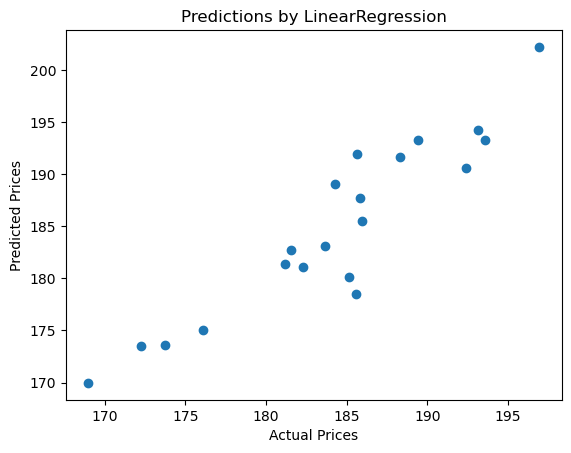

In [27]:
best_model = LinearRegression()
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title(f"Predictions by {best_model.__class__.__name__}")
plt.show()

In [ ]:
# Created from PyQuant Guide - Edoardo Alberto Donolato